# How do employee's priorities influence their WORK_LIFE_BALANCE_SCORE?

To find out the answer to this question we are going to perform a multiple linear regression to find out the factors that have the most influence on the WORK_LIFE_BALANCE_SCORE.


## Import the neccessary libraries

For this exercise we are mainly going to need pandas and numpy libraries in Python 3.

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import dataset

The next step is to import our dataset in a csv format which is called FAU_Bank_Employee_Wellbeing.csv

In [98]:
df = pd.read_csv("FAU_Bank_Employee_Wellbeing.csv", sep = ',')

## Data cleaning

Now, let's check whether the data is clean and doesn't contain any missing values or null values. We use "isnull" function which returns true if there are some null values and false if there are not. 

In [99]:
df.isnull().values.any()

True

The function returns true so we need to remove the null values and check it again. For that we use the "dropna" function.

In [100]:
df=df.dropna(axis=0, how='any')

In [102]:
df.isnull().values.any()

False

## Dataset summary

Let's see which variables we have in our dataset.

In [103]:
df.columns

Index(['Employee_ID', 'JOB_ROLE', 'DAILY_STRESS', 'WORK_TRAVELS', 'TEAM_SIZE',
       'DAYS_ABSENT', 'WEEKLY_EXTRA_HOURS', 'ACHIEVED_BIG_PROJECTS',
       'EXTRA_HOLIDAYS', 'BMI_RANGE', 'TODO_COMPLETED',
       'DAILY_STEPS_IN_THOUSAND', 'SLEEP_HOURS', 'LOST_VACATION',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_HOBBY', 'AGE',
       'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

We see that there are 20 variables in our dataset.

Let's take a look at the first rows of the dataset to get some understanding of how it looks like.

In [104]:
df.head()

,Employee_ID,JOB_ROLE,DAILY_STRESS,WORK_TRAVELS,TEAM_SIZE,DAYS_ABSENT,WEEKLY_EXTRA_HOURS,ACHIEVED_BIG_PROJECTS,EXTRA_HOLIDAYS,BMI_RANGE,TODO_COMPLETED,DAILY_STEPS_IN_THOUSAND,SLEEP_HOURS,LOST_VACATION,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_HOBBY,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,13943,Business Analyst,2.0,2,5,0,5,2,0,1,6,5,7,5,1,4,0,36 to 50,Female,609.5
1,14965,Bank Teller,3.0,4,3,8,10,5,2,2,5,5,8,2,2,3,2,36 to 50,Female,655.6
2,11561,Loan Processor,3.0,3,4,4,10,3,2,2,2,4,8,10,2,4,8,36 to 50,Female,631.6
3,6481,Business Analyst,3.0,10,3,10,7,2,5,2,3,5,5,7,1,5,2,51 or more,Female,622.7
4,3259,Investment Banker,1.0,3,3,10,4,2,4,2,5,5,7,0,2,8,1,51 or more,Female,663.9


To get some general understanding of the dataset let's take advantage of the "describe" function. It gives us the count of raws, the mean, the standard deviation, min and max and so on. 

In [105]:
df.describe()

,Employee_ID,DAILY_STRESS,WORK_TRAVELS,TEAM_SIZE,DAYS_ABSENT,WEEKLY_EXTRA_HOURS,ACHIEVED_BIG_PROJECTS,EXTRA_HOLIDAYS,BMI_RANGE,TODO_COMPLETED,DAILY_STEPS_IN_THOUSAND,SLEEP_HOURS,LOST_VACATION,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_HOBBY,WORK_LIFE_BALANCE_SCORE
count,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000
mean,8021.385449,2.791685,5.233235,5.508296,5.616179,6.474047,4.000689,2.715171,1.410619,5.745977,5.703588,7.042953,2.898441,1.728946,5.711289,3.326279,666.750510
std,4621.218807,1.367801,3.311847,2.840287,3.241937,3.086643,2.755912,1.851556,0.491962,2.624179,2.891102,1.199053,3.691867,0.444518,3.089540,2.729128,45.021103
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,480.000000
25%,4010.000000,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,3.000000,6.000000,0.000000,1.000000,3.000000,1.000000,636.000000
50%,8054.000000,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,1.000000,6.000000,5.000000,7.000000,0.000000,2.000000,5.000000,3.000000,667.700000
75%,12001.000000,4.000000,8.000000,8.000000,9.500000,10.000000,6.000000,5.000000,2.000000,8.000000,8.000000,8.000000,5.000000,2.000000,9.000000,5.000000,698.500000
max,15998.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,820.200000


Text(0.5, 1.0, 'WORK_LIFE_BALANCE_SCORE of the employees of SUFFICIENT_INCOME')

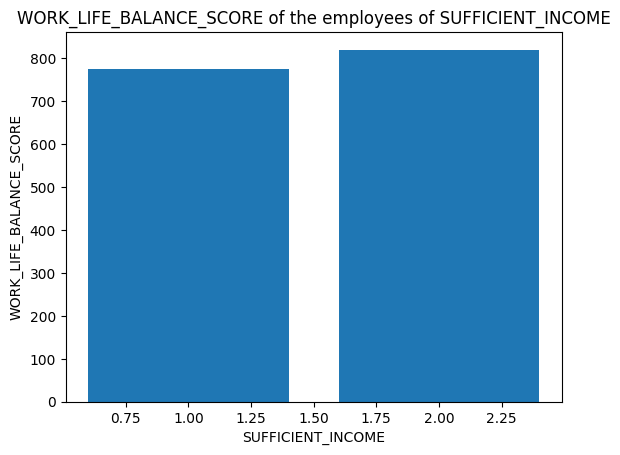

In [106]:
plt.bar('SUFFICIENT_INCOME', 'WORK_LIFE_BALANCE_SCORE', data =df)
plt.ylabel('WORK_LIFE_BALANCE_SCORE')
plt.xlabel('SUFFICIENT_INCOME')
plt.title('WORK_LIFE_BALANCE_SCORE of the employees of SUFFICIENT_INCOME')

We can observe a gradual increase of WORK_LIFE_BALANCE_SCORE with SUFFICIENT_INCOME.

In [75]:
#Data Transfer: Now we transfer the string data to numeric data 

In [107]:
from sklearn.preprocessing import LabelEncoder
df_cat=df.select_dtypes(object)
df_num=df.select_dtypes(["int64","float64"])
for col in df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])
df_ml=pd.concat([df_cat,df_num],axis=1)
df_ml.head()

,JOB_ROLE,AGE,GENDER,Employee_ID,DAILY_STRESS,WORK_TRAVELS,TEAM_SIZE,DAYS_ABSENT,WEEKLY_EXTRA_HOURS,ACHIEVED_BIG_PROJECTS,EXTRA_HOLIDAYS,BMI_RANGE,TODO_COMPLETED,DAILY_STEPS_IN_THOUSAND,SLEEP_HOURS,LOST_VACATION,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_HOBBY,WORK_LIFE_BALANCE_SCORE
0,1,1,0,13943,2.0,2,5,0,5,2,0,1,6,5,7,5,1,4,0,609.5
1,0,1,0,14965,3.0,4,3,8,10,5,2,2,5,5,8,2,2,3,2,655.6
2,7,1,0,11561,3.0,3,4,4,10,3,2,2,2,4,8,10,2,4,8,631.6
3,1,2,0,6481,3.0,10,3,10,7,2,5,2,3,5,5,7,1,5,2,622.7
4,6,2,0,3259,1.0,3,3,10,4,2,4,2,5,5,7,0,2,8,1,663.9


In [108]:
# Bar charts between DAILY_STRESS vs GENDER
# show the mean value of DAILY_STRESS
df.groupby('GENDER', as_index=False)['DAILY_STRESS'].mean()

,GENDER,DAILY_STRESS
0,Female,2.923717
1,Male,2.578767


Text(0, 0.5, 'DAILY_STRESS')

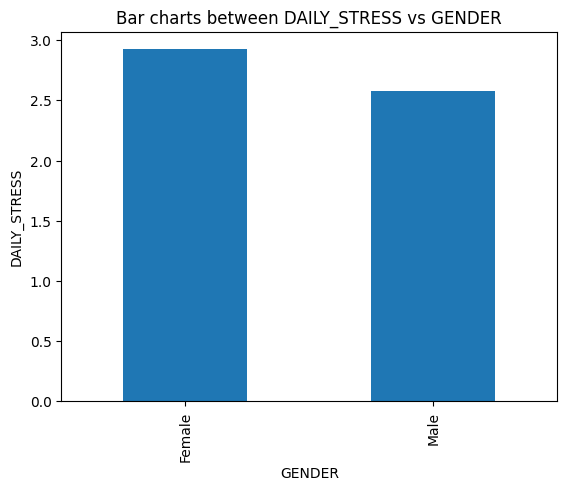

In [109]:
df.groupby('GENDER')['DAILY_STRESS'].mean().plot.bar()
plt.title('Bar charts between DAILY_STRESS vs GENDER')
plt.xlabel('GENDER')
plt.ylabel('DAILY_STRESS')

In [110]:
# Bar charts between DAILY_STRESS vs JOB_ROLE
# show the mean of DAILY_STRESS for different JOB_ROLE
df.groupby('JOB_ROLE', as_index=False)['DAILY_STRESS'].mean()

,JOB_ROLE,DAILY_STRESS
0,Bank Teller,2.782477
1,Business Analyst,2.736941
2,Credit Analyst,2.771144
3,Customer Service,2.757439
4,Finance Analyst,2.820702
5,Human Resources,2.881119
6,Investment Banker,2.739103
7,Loan Processor,2.844196
8,Mortgage Consultant,2.786352
9,Risk Analyst,2.796285


<Axes: title={'center': 'Bar charts between DAILY_STRESS vs JOB_ROLE'}, xlabel='JOB_ROLE', ylabel='DAILY_STRESS'>

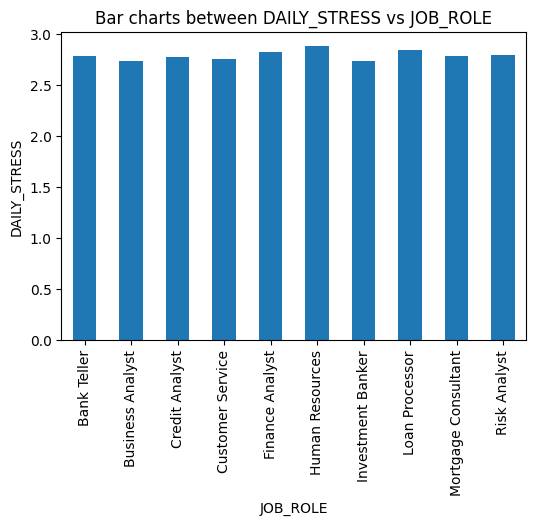

In [147]:
plt.figure(figsize=(6,4))
plt.title('Bar charts between DAILY_STRESS vs JOB_ROLE')
plt.xlabel('JOB_ROLE')
plt.ylabel('DAILY_STRESS')
df.groupby('JOB_ROLE')['DAILY_STRESS'].mean().plot.bar()

In [112]:
# Bar charts between TIME_FOR_HOBBY vs GENDER
# show the mean value of DAILY_STRESS for different GENDER
df.groupby('GENDER', as_index=False)['TIME_FOR_HOBBY'].mean()

,GENDER,TIME_FOR_HOBBY
0,Female,3.290627
1,Male,3.383772


Text(0, 0.5, 'TIME_FOR_HOBBY')

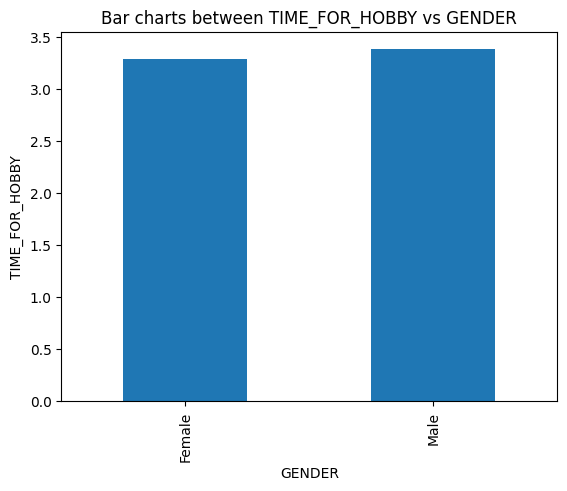

In [113]:
df.groupby('GENDER')['TIME_FOR_HOBBY'].mean().plot.bar()
plt.title('Bar charts between TIME_FOR_HOBBY vs GENDER')
plt.xlabel('GENDER')
plt.ylabel('TIME_FOR_HOBBY')

In [114]:
# Build a correlation matrix 
corr=df_ml.corr()
corr

,JOB_ROLE,AGE,GENDER,Employee_ID,DAILY_STRESS,WORK_TRAVELS,TEAM_SIZE,DAYS_ABSENT,WEEKLY_EXTRA_HOURS,ACHIEVED_BIG_PROJECTS,EXTRA_HOLIDAYS,BMI_RANGE,TODO_COMPLETED,DAILY_STEPS_IN_THOUSAND,SLEEP_HOURS,LOST_VACATION,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_HOBBY,WORK_LIFE_BALANCE_SCORE
JOB_ROLE,1.000000,0.002905,0.007726,-0.008688,0.010676,0.004489,0.015643,0.007429,0.003789,0.011010,0.003941,0.004699,0.000842,0.011949,0.001634,0.010545,-0.000826,0.018237,0.011963,0.007991
AGE,0.002905,1.000000,-0.039220,0.018531,-0.036918,-0.035345,0.030420,0.042784,0.078263,0.047040,0.067304,0.014283,0.033510,0.032746,-0.006306,-0.019849,0.060663,0.036682,0.014026,0.084606
GENDER,0.007726,-0.039220,1.000000,-0.002208,-0.122585,-0.042662,-0.096481,-0.131476,-0.041020,0.000598,-0.118754,-0.010766,-0.081400,0.037650,-0.058400,0.025780,0.010419,-0.013848,0.016590,-0.039911
Employee_ID,-0.008688,0.018531,-0.002208,1.000000,-0.003413,0.010063,-0.008209,-0.011222,-0.010603,-0.001279,-0.003838,-0.010184,-0.003753,0.004111,0.000986,-0.004848,-0.001861,-0.006831,-0.006589,-0.001896
DAILY_STRESS,0.010676,-0.036918,-0.122585,-0.003413,1.000000,-0.134857,-0.120238,-0.029852,0.020930,-0.110943,-0.037721,0.083110,-0.163727,-0.065511,-0.157037,0.196953,-0.144573,-0.042535,-0.158141,-0.365399
WORK_TRAVELS,0.004489,-0.035345,-0.042662,0.010063,-0.134857,1.000000,0.255803,0.237981,0.149358,0.257960,0.204597,-0.108054,0.227671,0.196128,0.127251,-0.129167,0.176672,0.269723,0.177892,0.529673
TEAM_SIZE,0.015643,0.030420,-0.096481,-0.008209,-0.120238,0.255803,1.000000,0.337859,0.308773,0.289460,0.221875,-0.025965,0.224380,0.148021,0.066325,-0.080804,0.123117,0.253981,0.227796,0.507594
DAYS_ABSENT,0.007429,0.042784,-0.131476,-0.011222,-0.029852,0.237981,0.337859,1.000000,0.316200,0.360077,0.393149,0.038558,0.256698,0.147592,0.007125,-0.018256,0.113340,0.332666,0.327750,0.548854
WEEKLY_EXTRA_HOURS,0.003789,0.078263,-0.041020,-0.010603,0.020930,0.149358,0.308773,0.316200,1.000000,0.249025,0.156792,0.019843,0.204438,0.215799,-0.029662,0.016506,0.123638,0.209041,0.200535,0.412580
ACHIEVED_BIG_PROJECTS,0.011010,0.047040,0.000598,-0.001279,-0.110943,0.257960,0.289460,0.360077,0.249025,1.000000,0.233697,-0.019699,0.304972,0.185946,0.045261,0.000727,0.113779,0.396180,0.368936,0.561241


In [115]:
# Find which attributes are more correlated with WORK_LIFE_BALANCE_SCORE
corr["WORK_LIFE_BALANCE_SCORE"]

JOB_ROLE                   0.007991
AGE                        0.084606
GENDER                    -0.039911
Employee_ID               -0.001896
DAILY_STRESS              -0.365399
WORK_TRAVELS               0.529673
TEAM_SIZE                  0.507594
DAYS_ABSENT                0.548854
WEEKLY_EXTRA_HOURS         0.412580
ACHIEVED_BIG_PROJECTS      0.561241
EXTRA_HOLIDAYS             0.458825
BMI_RANGE                 -0.252026
TODO_COMPLETED             0.545503
DAILY_STEPS_IN_THOUSAND    0.422981
SLEEP_HOURS                0.196420
LOST_VACATION             -0.266318
SUFFICIENT_INCOME          0.403554
PERSONAL_AWARDS            0.504225
TIME_FOR_HOBBY             0.516979
WORK_LIFE_BALANCE_SCORE    1.000000
Name: WORK_LIFE_BALANCE_SCORE, dtype: float64

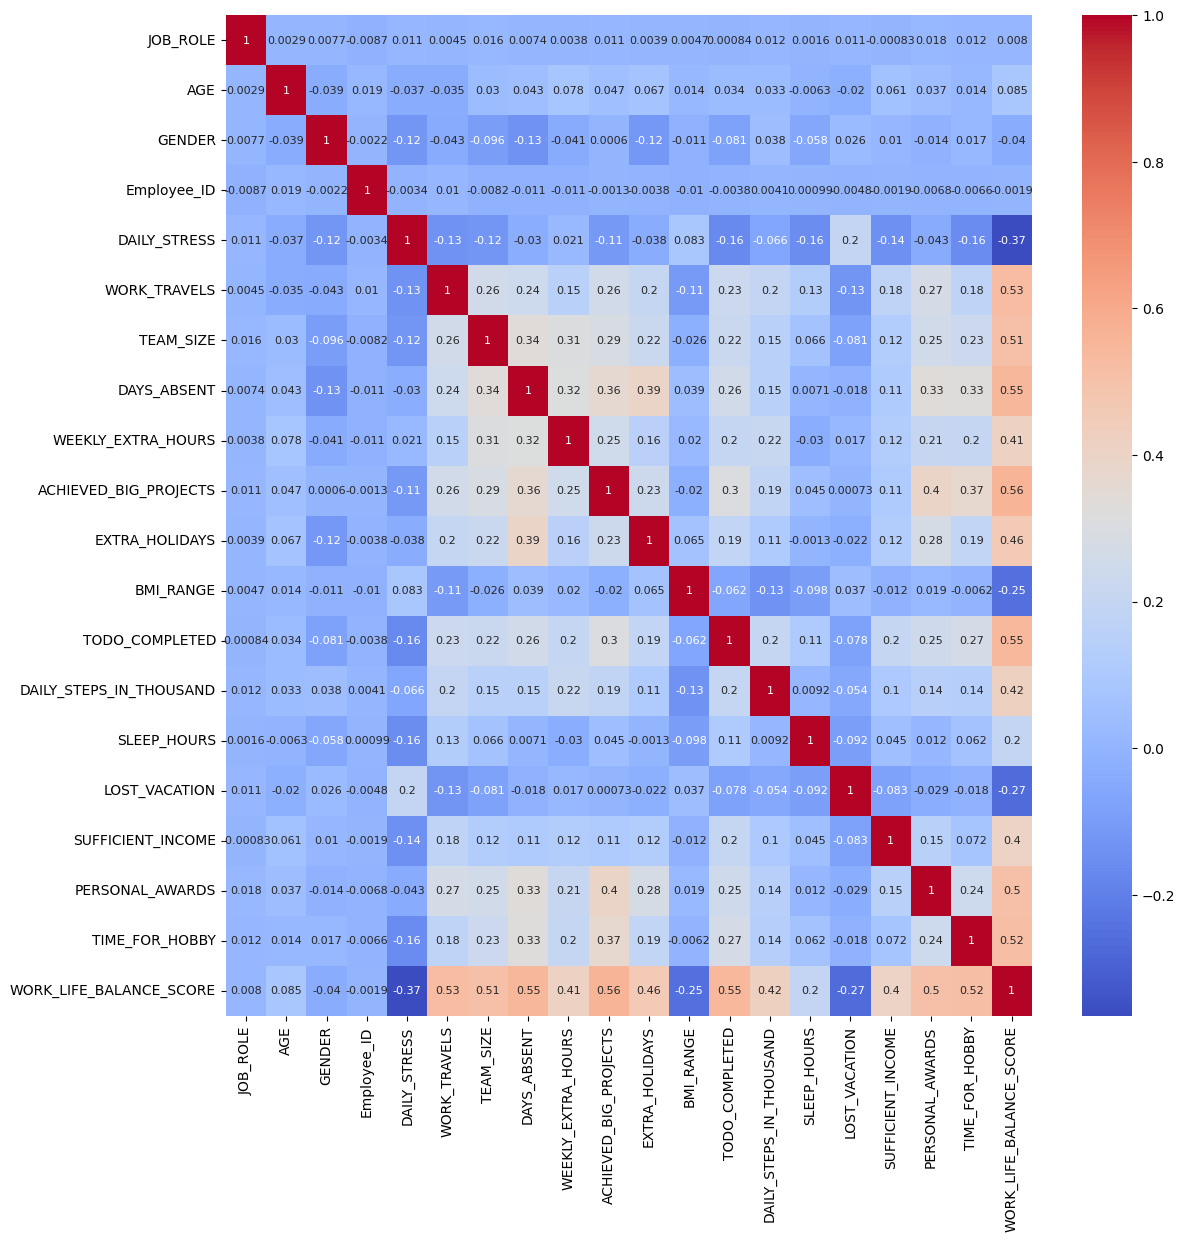

In [149]:
#Show the correlation matrix in Heatmap
corr=df_ml.corr()
plt.figure(figsize=(13,13))
hx=sns.heatmap(corr,annot=True,annot_kws={'size':8},cmap='coolwarm')
fig1=hx.figure
fig1.savefig("WLB corr heatmap.png")

## Define the dependent variable (y) and the independent variable (x). 
In our case the dependent variable would be the well-being and all of the other variables would be independent. Now we can analyze the influence of the independent variables to the dependent one.

In [117]:
x = df_ml.drop(['WORK_LIFE_BALANCE_SCORE'], axis=1)
y = df_ml['WORK_LIFE_BALANCE_SCORE']

## Split the dataset in training set and test set
We have to divide our dataset to the training set and test set so that we can firstly train our model and then test how it works. 
We set the test size to be 30% so training set would 70%.
To do that we would need the "train_test_split" function from sklearn.model_selection. So let's import the function and split the dataset.

In [118]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

## Train the model on the training set

Now we train our model with the help of LinearRegression function. We don't see any results yet though. It's going to help us in the next steps.

In [119]:
from sklearn.linear_model import LinearRegression 
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

## Predict the test results

To make sure that our model works and is capable of predicting values, let's predict the performance using our test set so that we can compare with the actual performance of the employees. Let's take for example the the values from the first row (not zero) of our table and predict the performance of this employee.

In [120]:
y_pred = ml.predict(x_test)
predicted_value = ml.predict([[1,1,0,13943,2,2,5,0,5,2,0,1,6,5,7,5,1,4,0]])
actual_value = df.loc[1,'WORK_LIFE_BALANCE_SCORE']

print(predicted_value, actual_value)

[610.38470804] 655.6


C:\Users\Sayedur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [154]:
#Predict the score for a new employee
y_pred = ml.predict(x_test)
predicted_value = ml.predict([[7,2,1,540,2,10,5,4,7,4,1,3,4,3,6,6,2,7,5]])
print(predicted_value)

[636.60266536]


C:\Users\Sayedur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


We can see that the model predicted the WORK_LIFE_BALANCE_SCORE of this employee based on all the attributes is 610.38 whereas the actual value is 655.6. So we can say that model predicts the well-being based on the priorities pretty good. But let's calculate it precisely in the next step.  

## Evaluate the model

To evaluate the model we use r2 score. The closer this score is to 1 the more precise our model is. 
To calculate it we use r2_score function from sklearn.metrics

In [121]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.944932553083408

We see that r2 score is around 0.94, which means that 94% of the variability observed in the WORK_LIFE_BALANCE_SCORE is explained by the regression model.

## Plot the results

Now, let's have some graphical representation of how accurate our model is. 
To create the graph we use the matplotlib.pyplot library. 

Text(0.5, 1.0, 'Actual vs. Predicted')

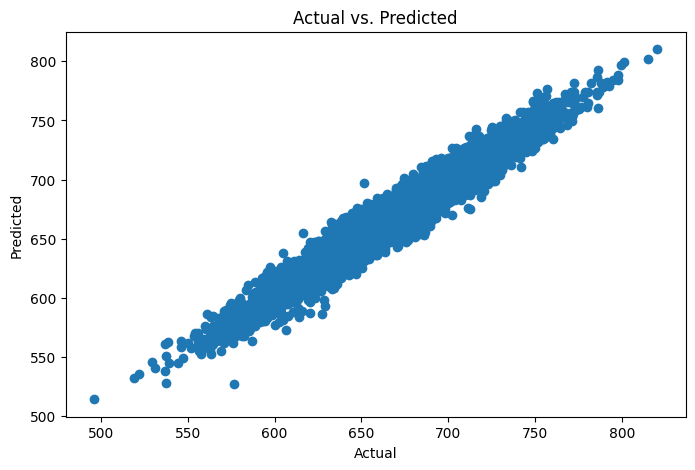

In [150]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

Although, there some variations, we see a linear corellation between actual and predicted values which shows that our model is appropriate. 

## Actual and Predicted values for the first 20 values

Let's now see the actual and the predicted values as well as the difference between them for the first 20 values.

In [152]:
pred_y_df = pd.DataFrame({'Actual Value': y_test, 'Predicted value': y_pred, 'Difference': y_test - y_pred})
pred_y_df[0:14]

,Actual Value,Predicted value,Difference
5476,632.6,627.221416,5.378584
4507,652.0,659.815251,-7.815251
8812,647.5,655.436955,-7.936955
11151,622.3,639.534248,-17.234248
5242,780.4,773.763672,6.636328
7408,598.7,608.471630,-9.771630
12083,593.2,595.153467,-1.953467
10677,680.3,680.753234,-0.453234
11584,600.0,607.706875,-7.706875
14857,631.4,627.425264,3.974736


We see that the model is pretty accurate as the differences are small. 

## Represent the summary of the model

Now, let's represent the summary of our model using "statsmodels" and try to find out which factors influence the performance the most. To do that, let's take a look at the coefficients of our independent variables. 

In [124]:
import statsmodels.api as sm
model = sm.OLS(y, x).fit()
print(model.summary2())

                            Results: Ordinary least squares
Model:                  OLS                     Adj. R-squared (uncentered): 0.992      
Dependent Variable:     WORK_LIFE_BALANCE_SCORE AIC:                         175506.2301
Date:                   2024-07-05 14:52        BIC:                         175652.1222
No. Observations:       15971                   Log-Likelihood:              -87734.    
Df Model:               19                      F-statistic:                 1.075e+05  
Df Residuals:           15952                   Prob (F-statistic):          0.00       
R-squared (uncentered): 0.992                   Scale:                       3463.3     
-------------------------------------------------------------------------------------------
                             Coef.     Std.Err.       t        P>|t|      [0.025     0.975]
-------------------------------------------------------------------------------------------
JOB_ROLE                     3.0250      

We see a general summary of the model with all the parameters. We can conclude that model works thanks to a high R-squared and adjusted R-squared, very close to 1. We can also see that SUFFICIENT_INCOME is the most important factor explaining around 66% according to it's coefficient.


## Feature selection

To understand which features are the most important, we can take a look at P-values and try a backward selection since we have a lot of independent variables. The approach is to eliminate the variable with a highest P-vaule. As P-value is very low for all the variable except for LOST_VACATION, where we see a very high P-value. Therefore, we can remove this variable in our feature selection.

In [125]:
x2 = x.drop(['LOST_VACATION'], axis=1)
model2 = sm.OLS(y, x2).fit()

In [126]:
print(model2.summary2())

                            Results: Ordinary least squares
Model:                  OLS                     Adj. R-squared (uncentered): 0.992      
Dependent Variable:     WORK_LIFE_BALANCE_SCORE AIC:                         175504.4731
Date:                   2024-07-05 14:52        BIC:                         175642.6866
No. Observations:       15971                   Log-Likelihood:              -87734.    
Df Model:               18                      F-statistic:                 1.135e+05  
Df Residuals:           15953                   Prob (F-statistic):          0.00       
R-squared (uncentered): 0.992                   Scale:                       3463.2     
-------------------------------------------------------------------------------------------
                             Coef.     Std.Err.       t        P>|t|      [0.025     0.975]
-------------------------------------------------------------------------------------------
JOB_ROLE                     3.0229      